<a href="https://colab.research.google.com/github/youssef893/Medical-Cost-Prediction/blob/main/Medical_Cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset ==> https://www.kaggle.com/datasets/mirichoi0218/insurance

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor

In [220]:
data = pd.read_csv('/content/insurance.csv')

In [221]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [222]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [223]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [224]:
# encode every text data and convert it to numbers
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

In [225]:
correlation = data.corr()

<Axes: >

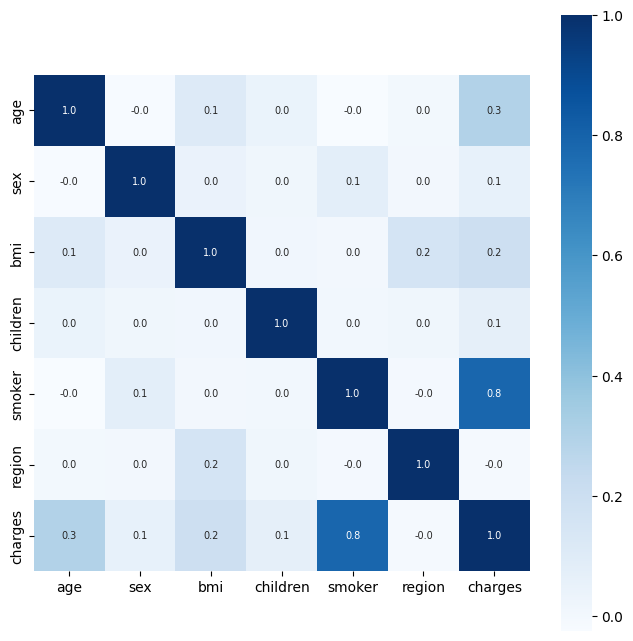

In [226]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':7}, cmap='Blues')

In [227]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


<ipython-input-228-9bc54bdecfec>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'], color='green')


<Axes: xlabel='age', ylabel='Density'>

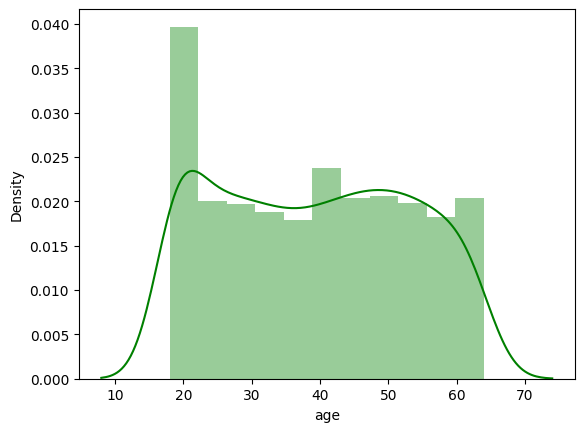

In [228]:
sns.distplot(data['age'], color='green')

<ipython-input-229-3170ea757535>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sex'], color='green')


<Axes: xlabel='sex', ylabel='Density'>

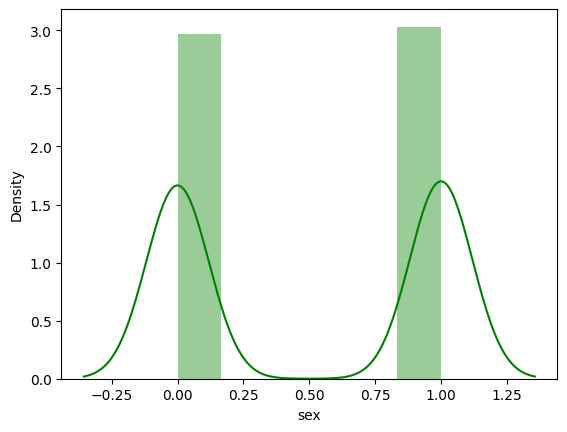

In [229]:
sns.distplot(data['sex'], color='green')

<ipython-input-230-9f88720472b9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'], color='green')


<Axes: xlabel='bmi', ylabel='Density'>

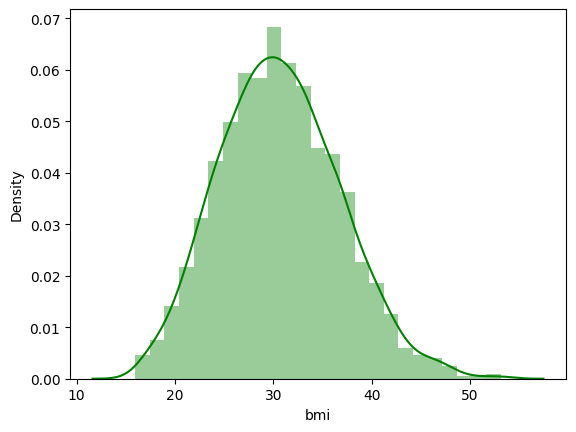

In [230]:
sns.distplot(data['bmi'], color='green')

<ipython-input-231-21e5fa1055a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['children'], color='green')


<Axes: xlabel='children', ylabel='Density'>

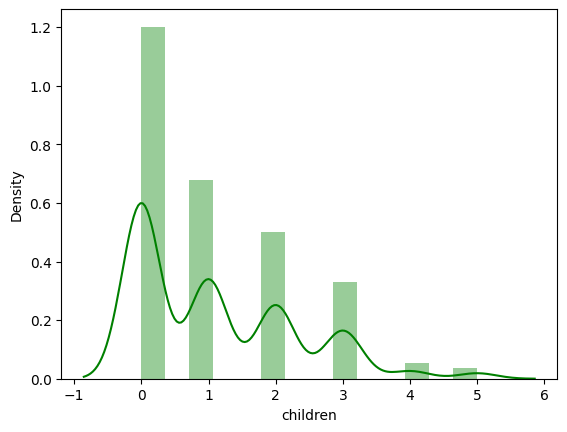

In [231]:
sns.distplot(data['children'], color='green')

<ipython-input-232-2fb8234d5b35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['smoker'], color='green')


<Axes: xlabel='smoker', ylabel='Density'>

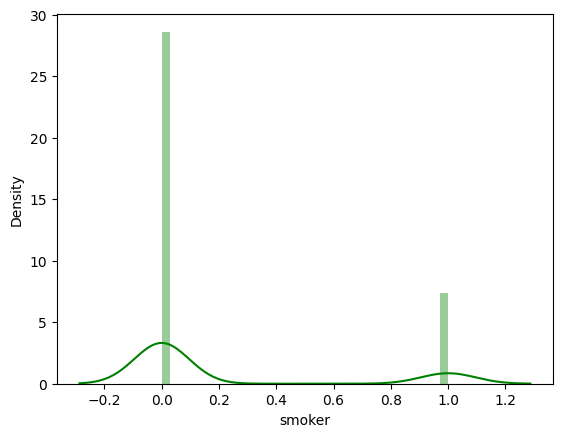

In [232]:
sns.distplot(data['smoker'], color='green')

<ipython-input-233-65163f57804a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['region'], color='green')


<Axes: xlabel='region', ylabel='Density'>

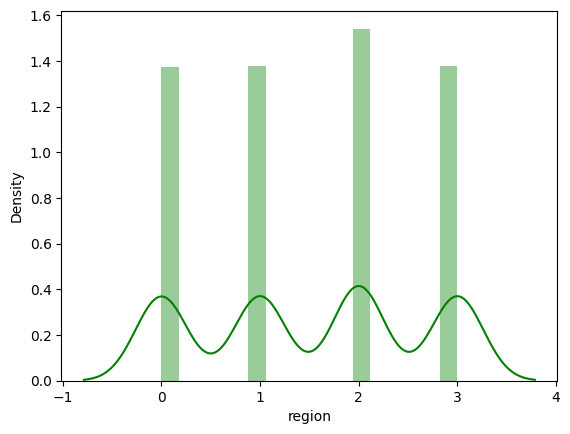

In [233]:
sns.distplot(data['region'], color='green')

In [234]:
features = data.drop(columns='charges',axis=1)  # drop last column
labels = data['charges']

In [235]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=20)

In [236]:
model = make_pipeline(RandomForestRegressor(max_depth=5, random_state=0))
model.fit(x_train, y_train)

Pipeline(steps=[('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=0))])

In [237]:
prediction = model.predict(x_test)
print(f'accuracy = {r2_score(prediction, y_test)}')

accuracy = 0.8906546254221425
